# Exploring Your Data - Lab

## Introduction 

In this lab, you'll perform an EDA task, using your skills with statistics and data visualizations. You'll continue using the Lego dataset that you've acquired and cleaned in the previous labs. 

## Objectives
You will be able to:

* Examine the descriptive statistics of our data set
* Create visualizations to better understand the distributions of variables in a dataset

## Data Exploration

At this point, you've already done a modest amount of EDA between investigating the initial dataset to further exploring individual features while cleaning things up in preparation for modeling. During this process, you've become more familiar with the particular idiosyncrasies of the dataset. This gives you an opportunity to uncover difficulties and potential pitfalls in working with the dataset as well as potential avenues for feature engineering that could improve the predictive performance of your model down the line. Remember that this is also not a linear process; after building an initial model, you might go back and continue to mine the dataset for potential inroads to create additional features and improve the model's performance if the initial results did not satisfy your needs and expectations. Here, you'll continue this process, investigating the distributions of some of the various features and their relationship to the target variable: `list_price`.

In the cells below: 

* Import `pandas` and set the standard alias. 
* Import `numpy` and set the standard alias. 
* Import `matplotlib.pyplot` and set the standard alias. 
* Import `seaborn` and set the alias `sns` (this is the standard alias for seaborn). 
* Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook. 
* Load the dataset stored in the `'Lego_data_cleaned.csv'` file into a DataFrame, `df`. 
* Inspect the head of the DataFrame to ensure everything loaded correctly. 

In [1]:
# Import libraries and load Lego_data_merged.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
plt.style.use('seaborn')
import seaborn as sns

df = pd.read_csv('Lego_dataset_cleaned.csv',index_col=None,encoding='latin-1')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [2]:
import warnings
warnings.filterwarnings('ignore')

- Describe the dataset using 5-point statistics. 

In [3]:
# Your code here
df.describe()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
count,1.087000e+04,10870.000000,1.087000e+04,1.087000e+04,1.087000e+04,1.087000e+04,10870.000000,10870.000000,10870.000000,10870.000000,...,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000
mean,2.287856e-17,67.309137,1.340030e-17,3.505388e-14,2.523956e-13,-1.584433e-13,0.049126,0.001932,0.013615,0.016927,...,0.046274,0.043330,0.044618,0.066421,0.308832,0.091536,0.351978,0.001932,0.083257,0.162466
std,1.000000e+00,94.669414,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.216141,0.043913,0.115894,0.129005,...,0.210088,0.203609,0.206474,0.249029,0.462033,0.288384,0.477609,0.043913,0.276282,0.368894
min,-6.050659e-01,2.272400,-4.264402e-01,-5.883334e+00,-5.641909e+00,-5.193413e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.895715e-01,21.899000,-3.705846e-01,-4.810100e-01,-4.602216e-01,-3.650101e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.379852e-01,36.587800,-2.868011e-01,2.160641e-01,1.615809e-01,1.178302e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.263593e-02,73.187800,-1.192341e-01,5.646012e-01,7.833834e-01,6.006705e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,8.466055e+00,1104.870000,9.795146e+00,1.087407e+00,9.906510e-01,1.244458e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Use pandas to plot histograms for all the numeric variables in the dataset. 

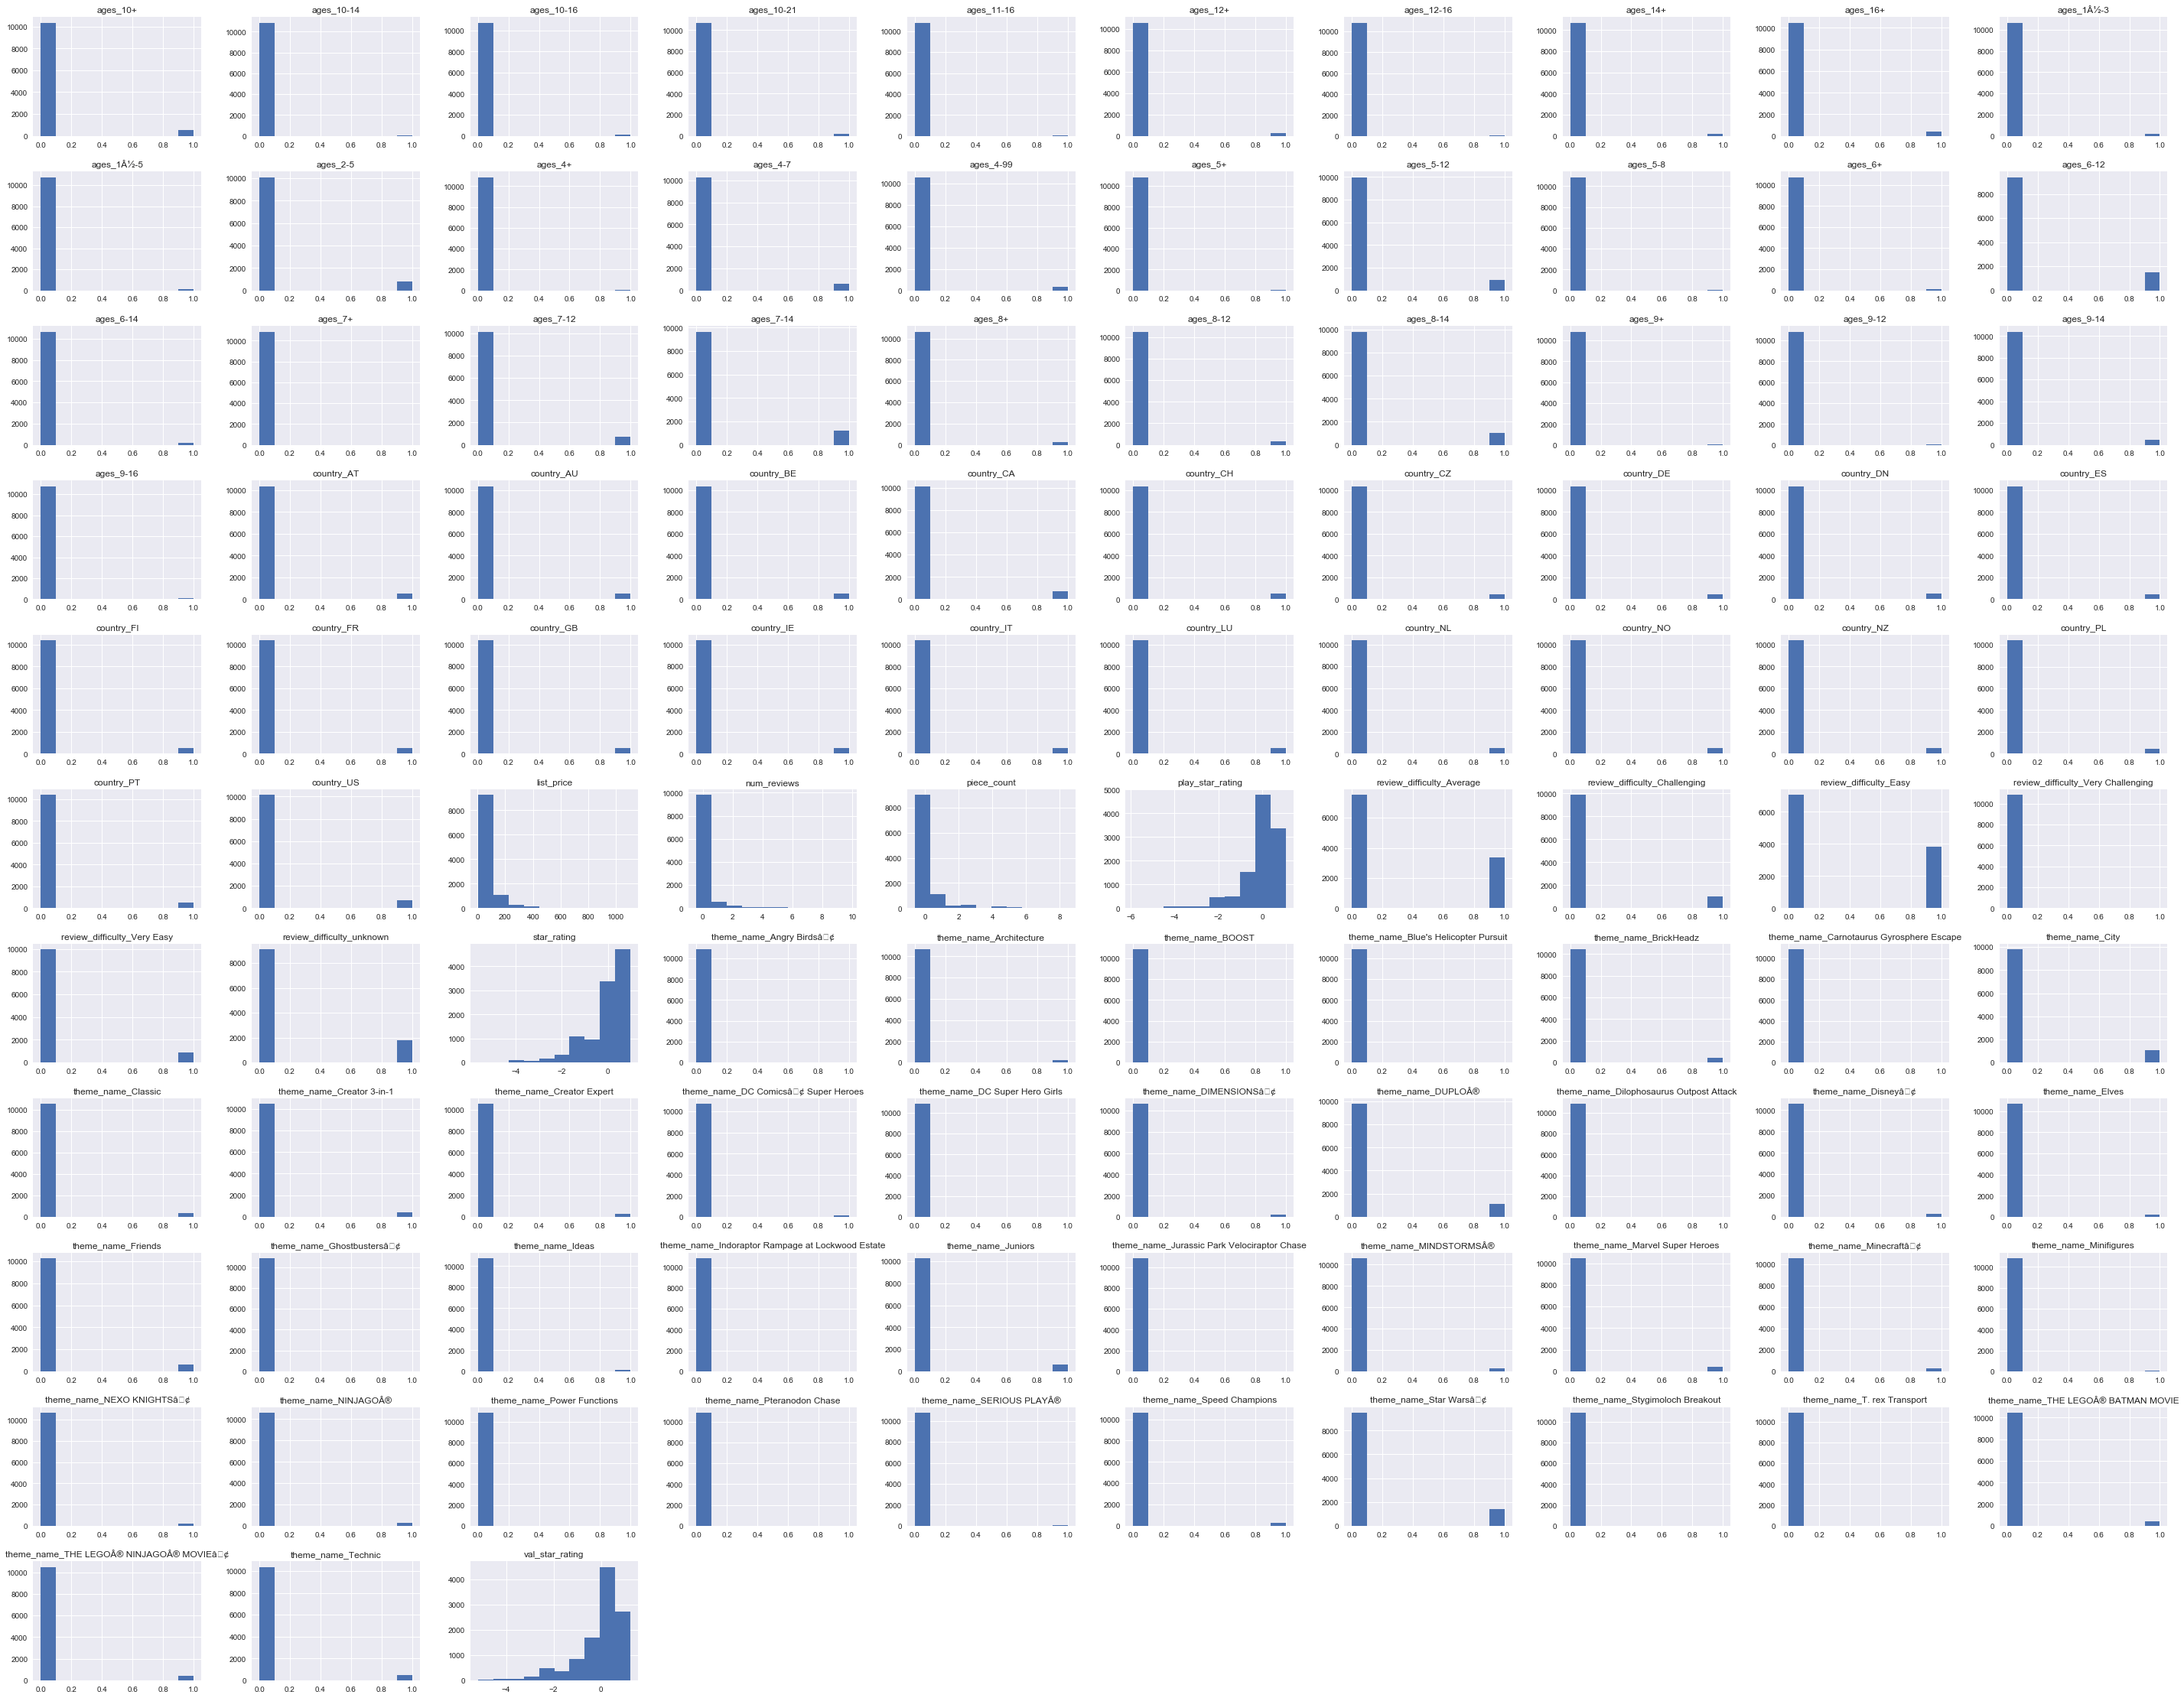

In [4]:
# Your code here
df.hist(figsize=(50,40))
plt.show()

Note how skewed most of these distributions are. While linear regression does not assume that each of the individual predictors are normally distributed, it does assume a linear relationship between the predictors and the target variable (`list_price` in this case). To further investigate if this assumption holds true, you can plot some single variable regression plots of each feature against the target variable using `seaborn`. 

## Check for Linearity

Recall that one assumption in linear regression is that the target variable is linearly related to the input features. As shown in the previous lesson, you can use the `sns.jointplot()` function to investigate whether this relation holds true for the various predictors on hand.

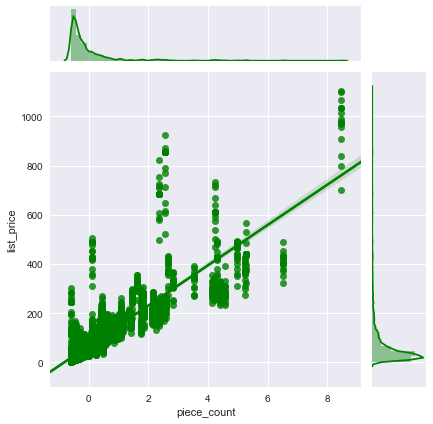

In [5]:
# Your code here
sns.jointplot(x='piece_count', y='list_price', data=df, kind='reg', color='g')

In [6]:
# Comment: piece_count seems to have a linear relationship with list_price

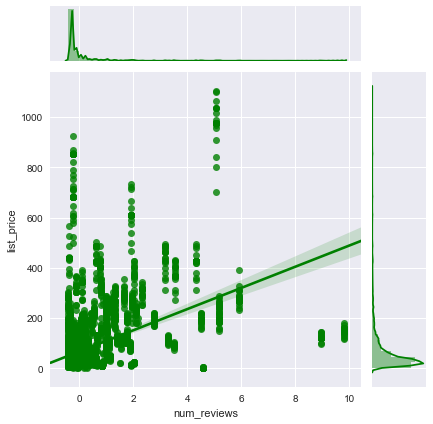

In [7]:
# Your code here
sns.jointplot(x='num_reviews', y='list_price', data=df, kind='reg', color='g')

In [8]:
# Comment: There seems to be a some-what linear correlation between num_reviews and list_price
# Though the relationship is noisier than what we saw with piece_count

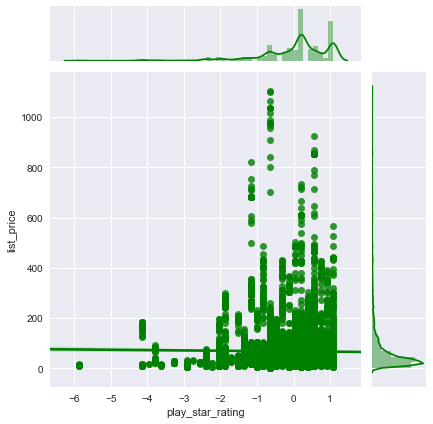

In [9]:
# Your code here
sns.jointplot(x='play_star_rating', y='list_price', data=df, kind='reg', color='g')

In [10]:
# Comment: play_star_rating doesn't seem to have much of a linear relationship 
# with list_price

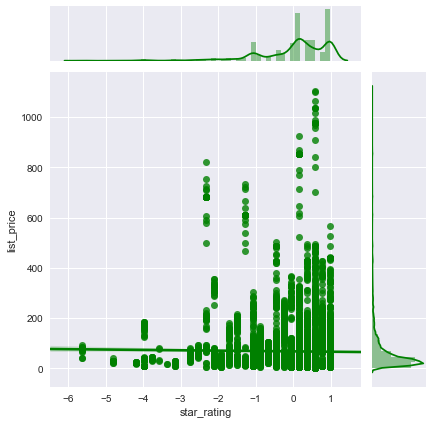

In [11]:
# Your code here
sns.jointplot(x='star_rating', y='list_price', data=df, kind='reg', color='g')

In [12]:
# Comment: Again, little to no linear relation.

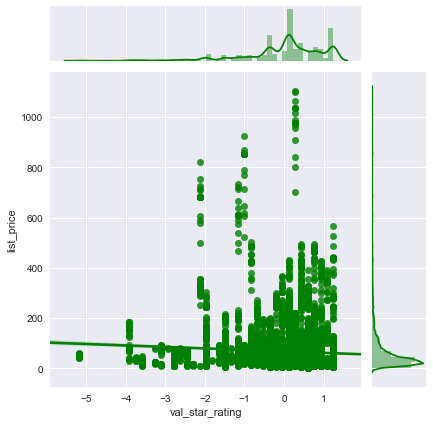

In [13]:
# Your code here
sns.jointplot(x='val_star_rating', y='list_price', data=df, kind='reg', color='g')

In [14]:
# Comment: Again, little to no linear relation.

In [15]:
# Comments:
# Well, at first look it appears that the previous efforts in order to fill in the null review values proved of little value. 
# Perhaps this was due to imputing the mean, but as it currently stands, each of the rating features seems to have little 
# to no predictive power for the upcoming model.

## Checking for Multicollinearity

It's also important to make note of whether your predictive features will result in multicollinearity in the resulting model. While definitive checks for multicollinearity require analyzing the resulting model, predictors with overly high pairwise-correlation (r > .65) are almost certain to produce multicollinearity in a model. With that, take a minute to generate the pairwise (pearson) correlation coefficients of your predictive features and visualize these coefficients as a heatmap.

In [16]:
# Your code here
feats = ['piece_count','num_reviews','play_star_rating','star_rating','val_star_rating']
df2 = df.loc[:,feats]
df2.head()

,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating
0,-0.273020,-0.398512,-0.655279,-0.045687,-0.365010
1,-0.404154,-0.398512,-0.655279,0.990651,-0.365010
2,-0.517242,-0.147162,-0.132473,-0.460222,-0.204063
3,0.635296,0.187972,-1.352353,0.161581,0.117830
4,0.288812,-0.063378,-2.049427,0.161581,-0.204063


In [17]:
# Your code here
df2.corr()

,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating
piece_count,1.000000,0.548783,-0.023281,0.055481,0.057313
num_reviews,0.548783,1.000000,-0.070892,-0.002466,0.020471
play_star_rating,-0.023281,-0.070892,1.000000,0.619044,0.485843
star_rating,0.055481,-0.002466,0.619044,1.000000,0.728203
val_star_rating,0.057313,0.020471,0.485843,0.728203,1.000000


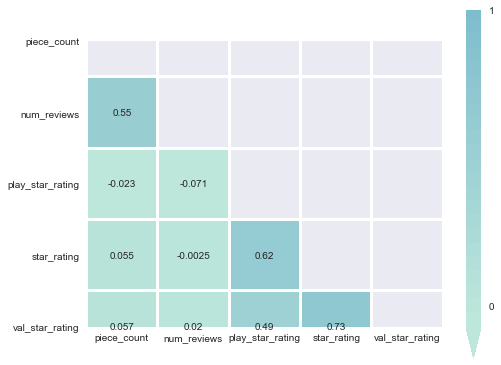

In [18]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(df2.corr(), mask=np.triu(df2.corr()), center=6.0, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

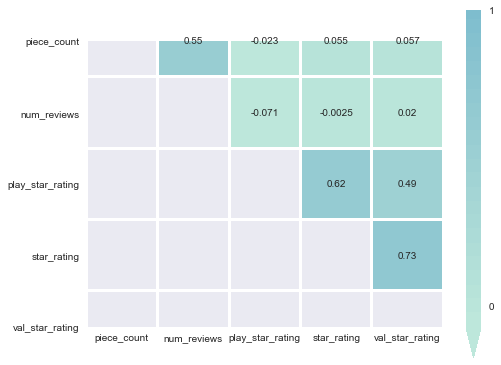

In [19]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(df2.corr(), mask=np.tril(df2.corr()), center=6.0, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

In [20]:
# Comments: 
# The rating features show little promise for adding predictive power towards the `list_price`. 
# This diminishes worry concerning their high correlation. 
# That said, the two most promising predictors: `piece_count` and `num_reviews` also display fairly high correlation. 
# Further analysis of an initial model will clearly be warranted.

## Further Resources

Have a look at following resources on how to deal with complex datasets that don't meet our initial expectations:  

- [What to Do When Bad Data Thwarts Machine Learning Success](https://towardsdatascience.com/what-to-do-when-bad-data-thwarts-machine-learning-success-fb82249aae8b)

- [Practical advice for analysis of large, complex data sets ](http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html)

- [Data Cleaning Challenge: Scale and Normalize Data](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)

## Summary 

In this lesson you performed some initial EDA using descriptive statistics and data visualizations to check for regression assumptions. In the upcoming lessons, you'll continue to carry out a standard Data Science process and begin to fit and refine an initial model.